# Imports

In [1047]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier

# Data loading

In [1048]:
dataframe = pd.read_excel('titanic.xls')

In [1049]:
dataframe.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Checking the uniqueness of rows

In [1050]:
print("Number of duplicated rows in our dataframe : ", dataframe.duplicated().sum())

Number of duplicated rows in our dataframe :  0


# Deleting meaningless columns

In [1051]:
dataframe = dataframe.drop(['cabin', 'home.dest', 'name', 'ticket'], axis=1)
dataframe.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body
0,1,1,female,29.0000,0,0,211.3375,S,2,NaN
1,1,1,male,0.9167,1,2,151.5500,S,11,NaN
2,1,0,female,2.0000,1,2,151.5500,S,NaN,NaN
3,1,0,male,30.0000,1,2,151.5500,S,NaN,135.0
4,1,0,female,25.0000,1,2,151.5500,S,NaN,NaN


# Checking if we have Null values and dealing with it

In [1052]:
null = dataframe.isnull().sum()
null

pclass         0
survived       0
sex            0
age          263
sibsp          0
parch          0
fare           1
embarked       2
boat         823
body        1188
dtype: int64

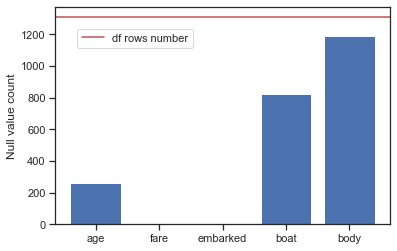

In [1053]:
plt.bar(null[null>0].index, null[null>0])
plt.axhline(y=dataframe.shape[0], c ='r', label="df rows number")
plt.legend(loc="upper left", borderaxespad=2)
plt.ylabel('Null value count')
plt.show()

The columns 'boat' and 'body' have too many null values (more than 50%) so we need to drop them.

In [1054]:
dataframe = dataframe.drop(['boat','body'], axis=1)
dataframe.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


# Encoding categorical columns

In [1055]:
dataframe = pd.get_dummies(dataframe)
dataframe.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,1,0,0,0,1
1,1,1,0.9167,1,2,151.5500,0,1,0,0,1
2,1,0,2.0000,1,2,151.5500,1,0,0,0,1
3,1,0,30.0000,1,2,151.5500,0,1,0,0,1
4,1,0,25.0000,1,2,151.5500,1,0,0,0,1


# Creating train/test set

In [1056]:
target = dataframe[['survived']]
dataframe = dataframe.drop(columns=['survived'], axis=1)

In [1057]:
X_train, X_test, y_train, y_test = train_test_split(dataframe, target)

# Imputing resiliant null values

In [1058]:
imputer = KNNImputer(n_neighbors=3)
X_train[:] = imputer.fit_transform(X_train)

In [1059]:
X_test[:] = imputer.transform(X_test)

In [1060]:
print('Number of null value in X_train :', X_train.isnull().sum().sum(), '\nNumber of null value in X_test :', X_test.isnull().sum().sum())

Number of null value in X_train : 0 
Number of null value in X_test : 0


# Scaling our data

In [1061]:
scaler = StandardScaler()
X_train[:] = scaler.fit_transform(X_train)

In [1062]:
X_test[:] = scaler.fit_transform(X_test)

# Lets take a look to our cleaned and scaled data

In [1063]:
X_train.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
289,-1.553622,-0.896255,-0.477467,1.740934,0.835166,1.319175,-1.319175,-0.520313,-0.325538,0.668508
267,-1.553622,1.867241,-0.477467,-0.450030,-0.062284,-0.758049,0.758049,1.921921,-0.325538,-1.495869
587,-0.360119,-2.059832,0.435584,0.645452,-0.203367,-0.758049,0.758049,-0.520313,-0.325538,0.668508
683,0.833384,0.703664,0.435584,0.645452,-0.340860,-0.758049,0.758049,-0.520313,3.071835,-1.495869
877,0.833384,-0.241743,0.435584,-0.450030,-0.479728,1.319175,-1.319175,-0.520313,-0.325538,0.668508


In [1064]:
y_train.head()

,survived
289,1
267,0
587,1
683,0
877,0


# PCA

In [1065]:
pca = PCA(n_components = 0.99)
pc_X_train = pca.fit_transform(X_train)
pc_X_test = pca.transform(X_test)
pc_df = pd.DataFrame(data=pc_X_train)
pc_df["survived"] = y_train["survived"].values
pca.explained_variance_ratio_

array([0.24760011, 0.20339003, 0.16337393, 0.1307279 , 0.09669306,
       0.06627199, 0.05681626, 0.03512672])

In [1066]:
pc_df

,0,1,2,3,4,5,6,7,survived
0,1.867820,1.560036,1.246532,-0.719662,0.080165,0.518454,1.437537,-1.068381,1
1,0.937056,-3.262192,0.262584,0.190914,-0.046422,0.680408,-1.068481,-0.537807,0
2,-1.002247,0.946582,0.729905,1.264703,-0.516400,-0.581614,1.069970,-1.100293,1
3,-0.584279,-0.576330,-2.464340,1.042777,2.646355,0.341149,0.148659,-0.174439,0
4,0.299459,1.806082,-0.361404,-0.994760,-0.554922,-0.329339,-0.714548,0.529781,0
...,...,...,...,...,...,...,...,...,...
976,0.883613,-2.418609,-0.056056,1.016512,-1.072699,-0.123265,0.026673,-1.141031,1
977,1.217044,1.200035,0.810943,-1.393719,0.766614,1.795032,-0.122486,-0.033451,1
978,1.005938,0.845612,-3.657743,-0.666428,0.983879,-0.507252,0.677439,-0.205082,1
979,-1.732984,0.080691,0.007596,0.015385,-0.560112,-0.076370,0.347334,0.295197,0


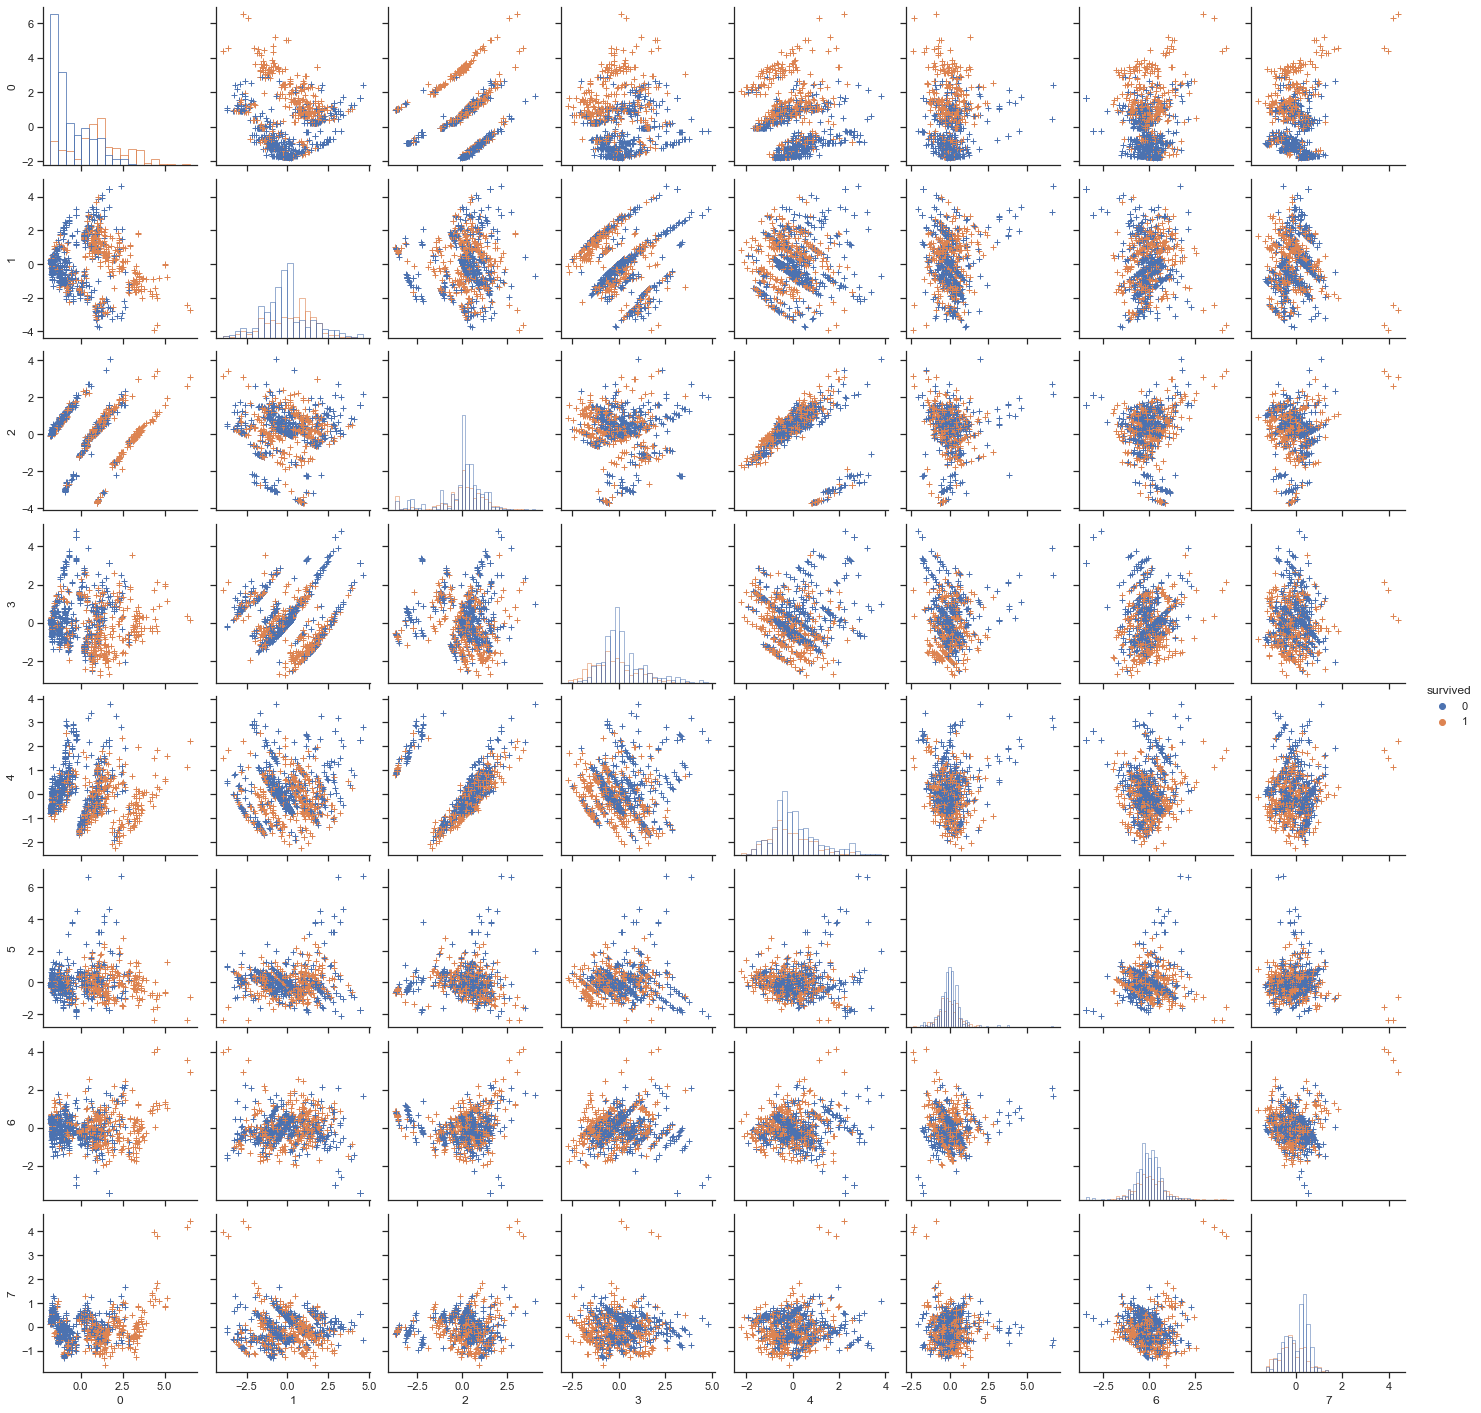

In [1067]:
sns.pairplot(pc_df,
             vars = [name for name in pc_df.columns if name != 'survived'],
             diag_kind="hist",
             hue="survived",
             diag_kws=dict(fill=False),
             plot_kws=dict(marker="+", linewidth=1))

# Now let's use our data to predict the target

In [1068]:
gbc = GradientBoostingClassifier().fit(X_train, y_train.values.ravel())

In [1071]:
gbc.score(X_test, y_test)

0.7987804878048781